In [13]:
!pip install indic-nlp-library

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--2024-09-22 11:35:09--  https://github.com/googlefonts/noto-fonts/raw/main/unhinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/notofonts/noto-fonts/raw/main/unhinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf [following]
--2024-09-22 11:35:09--  https://github.com/notofonts/noto-fonts/raw/main/unhinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/notofonts/noto-fonts/main/unhinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf [following]
--2024-09-22 11:35:09--  https://raw.githubusercontent.com/notofonts/noto-fonts/main/unhinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf
Resolving raw.gith

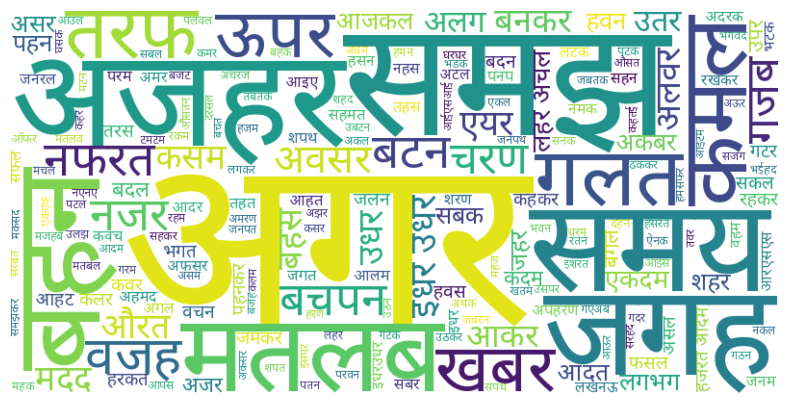

WordCloud for TSV file:


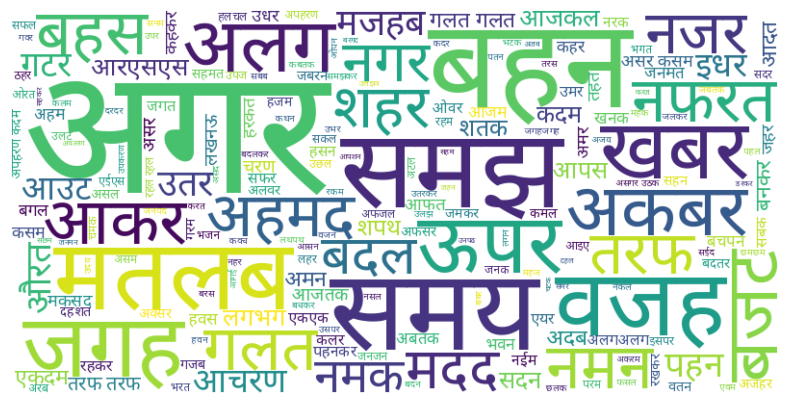

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from indicnlp import common
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
import nltk

# Download stopwords from NLTK if not already installed
nltk.download('stopwords')

# Download the Noto Sans Devanagari font from Google Fonts
!wget https://github.com/googlefonts/noto-fonts/raw/main/unhinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf -O /tmp/NotoSansDevanagari-Regular.ttf

# Set the path for the Indic NLP resources (update the path)
common.set_resources_path('/path/to/indic-nlp-resources')

# Load Hindi stopwords from a custom file
with open('/content/stopwords-hi.txt', 'r', encoding='utf-8') as f:
    hindi_stop_words = f.read().splitlines()

# Function to preprocess Hindi and Hinglish text data
def preprocess_text(text):
    # Create an instance of the normalizer for Hindi
    normalizer_factory = IndicNormalizerFactory()
    normalizer = normalizer_factory.get_normalizer("hi")

    # Normalize the text (remove special characters used in typing errors etc.)
    text = normalizer.normalize(text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters and punctuation, but keep Hindi/Unicode characters
    #text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)

    # Tokenize and remove stopwords
    stop_words_hindi = set(hindi_stop_words)
    stop_words_english = set(stopwords.words('english'))

    # Tokenize the text
    tokens = text.split()

    # Remove both Hindi and English stop words (for Hinglish)
    # Remove both Hindi and English stop words, and filter out words with length <= 2
    tokens = [word for word in tokens if word not in stop_words_hindi and
              word not in stop_words_english and len(word) > 2 and word.isalpha()]

    return ' '.join(tokens)

# Function to generate a wordcloud
def create_wordcloud(text):
    font="gargi.ttf"
    # Provide the correct path to the downloaded Devanagari font file
    wordcloud = WordCloud(font_path='/tmp/NotoSansDevanagari-Regular.ttf', width=800, height=400, background_color='white').generate(text)

    # Plot the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Upload XLSX and TSV files
def upload_files():
    # Assuming the XLSX and TSV files are located in your local directory or use file upload dialogs if running in a notebook
    xlsx_file_path = '/content/hasoc_2020_hi_train.xlsx'
    tsv_file_path = '/content/hindi_dataset.tsv'

    # Load the data into dataframes
    df_xlsx = pd.read_excel(xlsx_file_path)
    df_tsv = pd.read_csv(tsv_file_path, sep='\t')

    return df_xlsx, df_tsv

# Main code
if __name__ == "__main__":
    # Upload the files and load them into dataframes
    df_xlsx, df_tsv = upload_files()

    # Extract the text column (assume the text column is named 'text' in both dataframes)
    text_data_xlsx = df_xlsx['text'].dropna()
    text_data_tsv = df_tsv['text'].dropna()

    # Preprocess the text data
    preprocessed_text_xlsx = text_data_xlsx.apply(preprocess_text).str.cat(sep=' ')
    preprocessed_text_tsv = text_data_tsv.apply(preprocess_text).str.cat(sep=' ')

    # Generate word clouds for both XLSX and TSV text data
    print("WordCloud for XLSX file:")
    create_wordcloud(preprocessed_text_xlsx)

    print("WordCloud for TSV file:")
    create_wordcloud(preprocessed_text_tsv)
